In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
# first 10 rows.
df = pd.read_csv('/content/BIKE DETAILS.csv')
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [23]:
# Question 2: Check for missing values in all columns and describe your approach for
# handling them.

# to handle null values as there is the price change according to the bike model i prefer to drop the null values

df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0
bikes_age,0


<Axes: xlabel='selling_price', ylabel='Count'>

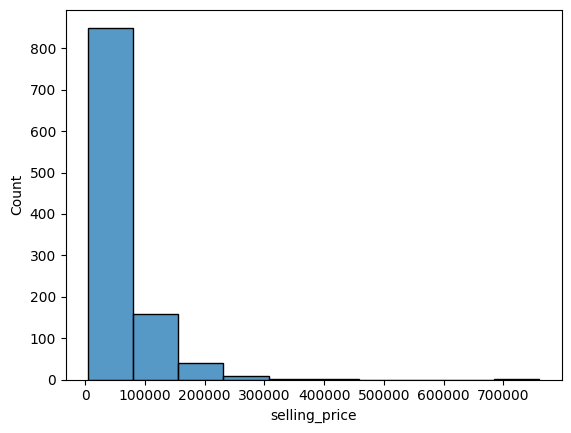

In [6]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the
# overall trend.
sns.histplot(x='selling_price', data = df, bins=10)

In [7]:
#insight - number of bikes is more whose selling price is lower than 100000
# data is skewed towards right

Text(0.5, 1.0, 'Average Selling Price by Seller Type')

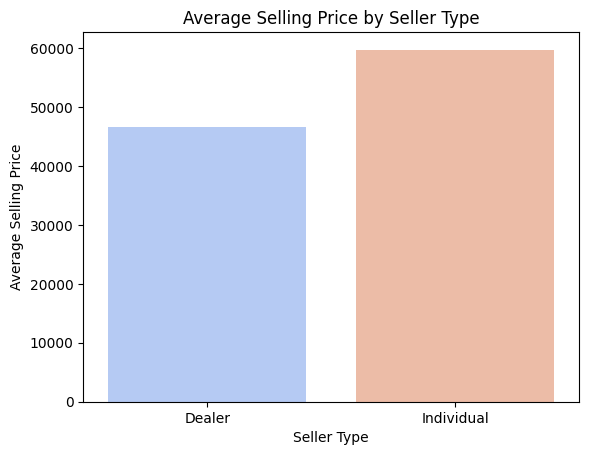

In [8]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type
# and write one observation.
res = df.groupby('seller_type')['selling_price'].mean()
sns.barplot(x=res.index, y=res.values, palette = 'coolwarm')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')

In [9]:
#insight - average selling price of the individual seller is higher than dealer

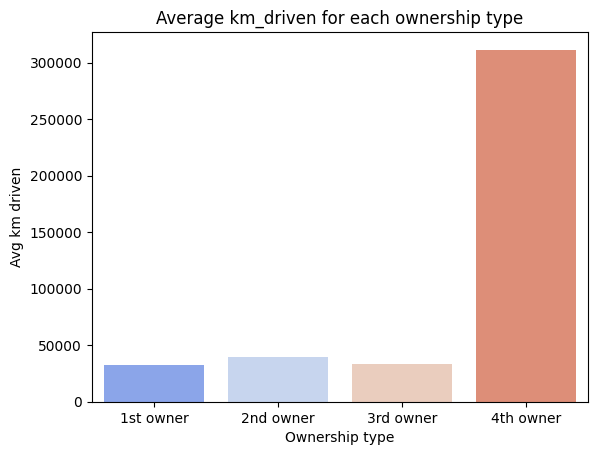

In [10]:
# Question 5: Compute the average km_driven for each ownership type (1st owner,
# 2nd owner, etc.), and present the result as a bar plot.


x = df.groupby('owner')['km_driven'].mean()
sns.barplot(x = x.index, y= x.values, palette = 'coolwarm')
plt.xlabel('Ownership type')
plt.ylabel('Avg km driven')
plt.title('Average km_driven for each ownership type')
plt.show()

In [11]:
##insight -  Average km driven is highest/ more for the 4th Owner

In [12]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven
# column. Show before-and-after summary statistics.



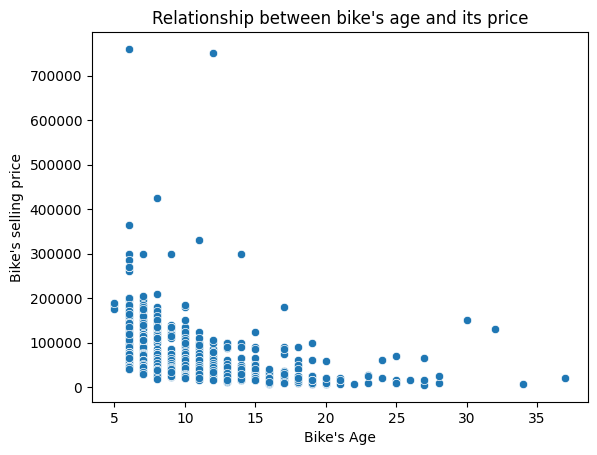

In [13]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the
# relationship between a bike's age and its price.
from datetime import datetime
current_year = datetime.now().year
df['bikes_age'] = current_year - df['year']
sns.scatterplot(x = 'bikes_age', y= 'selling_price', data = df)
plt.xlabel("Bike's Age")
plt.ylabel("Bike's selling price")
plt.title("Relationship between bike's age and its price")
plt.show()



In [14]:
##insight - As the age of bike increases the price of the bike dicreases

In [15]:
# Question 8: Convert the seller_type column into numeric format using one-hot
# encoding. Display the first 5 rows of the resulting DataFrame

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['seller_type'] = le.fit_transform(df['seller_type'])
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bikes_age
0,Royal Enfield Classic 350,175000,2019,1,1st owner,350,NaN,6
1,Honda Dio,45000,2017,1,1st owner,5650,NaN,8
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1,1st owner,12000,148114.0,7
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1,1st owner,23000,89643.0,10
4,Yamaha SZ [2013-2014],20000,2011,1,2nd owner,21000,NaN,14


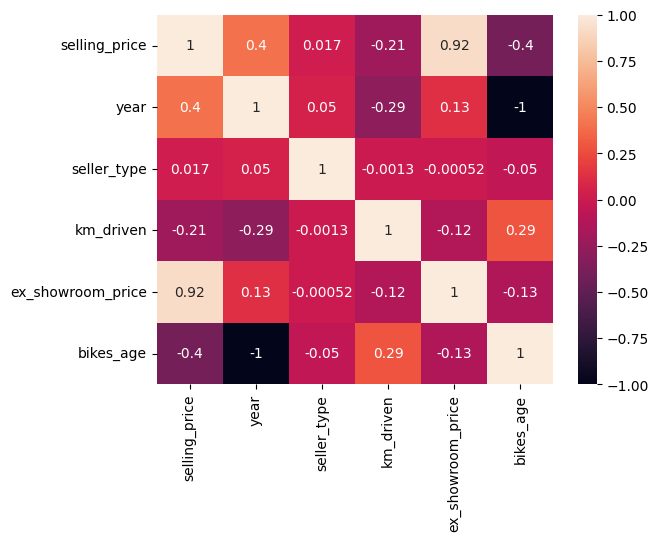

In [16]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
# What correlations stand out the most?

num_col = [col for col in df if df[col].dtype != 'object']

corr = df[num_col].corr()
sns.heatmap(corr, annot=True)
plt.show()

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?

Answer - bikes age affects the price as age increases price dicreases.
same for the kilometers km increases price dicreases.

positive relationship with showroom price as it increases price increases.


● Mention any data cleaning or feature engineering you performed.

Answer - feature engineering done created new column from the year column
label encoding done for seller_type column
